In [33]:
# Import the dependencies
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit

# # Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import Dependencies

from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [2]:
def latitudes(size):
    
    latitude = []
    x = 0
    while x<size:
        random_lat = random.randint(-90, 89) + random.random()
        latitude.append(random_lat)
        x+=1
    return latitude
# Call the function with 1500
%timeit latitudes(1500)

1.71 ms ± 44.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [3]:
%timeit np.random.uniform(-90.000,90.000,size = 50)
# longitude

2.92 µs ± 54.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
lats = np.random.uniform(-90.000, 90.000, size =1500)
longs = np.random.uniform(-90.000, 90.000, size =1500)
lat_long = zip(lats, longs)

coordinates = list(lat_long)

In [5]:
# use the tuple() funciton to display the latitude and longitude combination

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0],coordinate[1]).country_code)

irati br
guarapari br
east london za
ushuaia ar
shahr-e kord ir
sistranda no
bambous virieux mu
hamilton bm
lebu cl
tumannyy ru
vestmannaeyjar is
vestmanna fo
luderitz na
bredasdorp za
lebu cl
cajamarca pe
taolanaro mg
ushuaia ar
dikson ru
saint-philippe re
rawson ar
busselton au
ostrovnoy ru
aanekoski fi
mataruska banja rs
hermanus za
port elizabeth za
coquimbo cl
vestmannaeyjar is
busselton au
geraldton au
ponta do sol pt
bouna ci
dapaong tg
belushya guba ru
kavali in
toliary mg
busselton au
omboue ga
shache cn
bambous virieux mu
torbay ca
cape town za
chuy uy
hithadhoo mv
tasiilaq gl
ostrovnoy ru
barentsburg sj
beira mz
kommunisticheskiy ru
arraial do cabo br
surt ly
soller es
lubao cd
grand river south east mu
husavik is
ambodifototra mg
itarantim br
warsaw us
chapais ca
chicama pe
olafsvik is
camacupa ao
chuy uy
grand baie mu
tsihombe mg
ardabil ir
bogo cm
henties bay na
port alfred za
torbay ca
grand gaube mu
zverinogolovskoye ru
hermanus za
busselton au
cape town za
elverum no
j

ushuaia ar
arraial do cabo br
victoria sc
nanortalik gl
port alfred za
raudeberg no
bargal so
upernavik gl
grand gaube mu
jamestown sh
ano kastritsion gr
clyde river ca
nouakchott mr
hermanus za
hithadhoo mv
almeirim br
dikson ru
marsh harbour bs
floro no
cape town za
passo de camaragibe br
peniche pt
saint-philippe re
salalah om
bambous virieux mu
taolanaro mg
dikson ru
barentu er
ushuaia ar
cidreira br
los llanos de aridane es
ushuaia ar
cape town za
belushya guba ru
bredasdorp za
olafsvik is
maraba br
vardo no
sao joao da barra br
talnakh ru
taolanaro mg
camocim br
naryan-mar ru
chuy uy
jamestown sh
coquimbo cl
jamestown sh
saint george bm
mahebourg mu
normal us
coihaique cl
east london za
arraial do cabo br
francisco beltrao br
bredasdorp za
sept-iles ca
sao filipe cv
port alfred za
behbahan ir
tikaitnagar in
barentsburg sj
jamestown sh
pangnirtung ca
ushuaia ar
vangaindrano mg
merritt island us
touros br
east london za
belushya guba ru
dikson ru
lagoa pt
ikwiriri tz
dromolaxia cy


cape town za
bahia de caraquez ec
adre td
bredasdorp za
saint-augustin ca
kruisfontein za
sorland no
volkach de
lovozero ru
east london za
cape town za
port alfred za
jalu ly
punta arenas cl
port maria jm
pokhara np
bredasdorp za
upernavik gl
acari pe
araouane ml
bredasdorp za
hermanus za
kaspiyskiy ru
khorixas na
cape town za
jamestown sh
formoso do araguaia br
busselton au
japura br
ushuaia ar
goderich sl
illoqqortoormiut gl
floriano br
ushuaia ar
saint-philippe re
taolanaro mg
ushuaia ar
tamandare br
luderitz na
cabedelo br
kalaleh ir
port elizabeth za
tynset no
carauari br
turkistan kz
ponta do sol cv
aljezur pt
caraquet ca
goderich sl
port alfred za
port alfred za
luderitz na
yarim ye
punta arenas cl
belushya guba ru
amderma ru
mar del plata ar
barentsburg sj


In [6]:
# Create a list for holding the ciites
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, the we add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


593

In [7]:
# Create an empty list to hold the weather data
city_data = []

# print the beginning of the logging

print("Beginning Data Retrieval      ")
print("------------------------------")

#Create counters

record_count = 1
set_count = 1

Beginning Data Retrieval      
------------------------------


In [8]:
#Starting URL for Weather Map API call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d82315617a31ae0da2844e056aa6eee6


In [9]:
# Make a 'Get' request for the city weather
city_url = url +"&q=" + city.replace(" ","+")
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [10]:
if city_weather.status_code == 200:
    print(f"City Weather found.")
else: 
    print(f"City Weather not found.")

City Weather not found.


In [11]:
# loop through all the cities

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes:
    if(i% 50 == 0 and i>=50):
        set_count +=1
        record_count +=1
    
    #create endpoint URL with each city
    city_url = url +"&q=" + city.replace(" ","+")
    
    #Log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count}| {city} ")
    
    # Add 1 to the record count
    record_count +=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1| irati 
Processing Record 2 of Set 1| guarapari 
Processing Record 3 of Set 1| east london 
Processing Record 4 of Set 1| ushuaia 
Processing Record 5 of Set 1| shahr-e kord 
Processing Record 6 of Set 1| sistranda 
Processing Record 7 of Set 1| bambous virieux 
Processing Record 8 of Set 1| hamilton 
Processing Record 9 of Set 1| lebu 
Processing Record 10 of Set 1| tumannyy 
City not found. Skipping...
Processing Record 11 of Set 1| vestmannaeyjar 
Processing Record 12 of Set 1| vestmanna 
Processing Record 13 of Set 1| luderitz 
Processing Record 14 of Set 1| bredasdorp 
Processing Record 15 of Set 1| cajamarca 
Processing Record 16 of Set 1| taolanaro 
City not found. Skipping...
Processing Record 17 of Set 1| dikson 
Processing Record 18 of Set 1| saint-philippe 
Processing Record 19 of Set 1| rawson 
Processing Record 20 of Set 1| busselton 
Processing Record 21 of Set 1| ostrovnoy 
Processing Record 22 of Set 1| aanekoski 
Processing Record 23 of Set

Processing Record 187 of Set 4| saint george 
Processing Record 188 of Set 4| ushtobe 
Processing Record 189 of Set 4| kotovo 
Processing Record 190 of Set 4| kashi 
Processing Record 191 of Set 4| vila velha 
Processing Record 192 of Set 4| san andres 
Processing Record 193 of Set 4| mecca 
Processing Record 194 of Set 4| viransehir 
Processing Record 195 of Set 4| antofagasta 
Processing Record 196 of Set 4| felipe carrillo puerto 
Processing Record 197 of Set 4| copiapo 
Processing Record 198 of Set 4| old shinyanga 
Processing Record 199 of Set 4| denizli 
Processing Record 200 of Set 4| bedesa 
Processing Record 201 of Set 4| baboua 
City not found. Skipping...
Processing Record 202 of Set 4| manzil tamim 
City not found. Skipping...
Processing Record 203 of Set 4| caravelas 
Processing Record 205 of Set 5| krutinka 
Processing Record 206 of Set 5| nantucket 
Processing Record 207 of Set 5| bam 
Processing Record 208 of Set 5| warri 
Processing Record 209 of Set 5| wattegama 
Proc

Processing Record 374 of Set 8| normal 
Processing Record 375 of Set 8| coihaique 
Processing Record 376 of Set 8| francisco beltrao 
Processing Record 377 of Set 8| behbahan 
Processing Record 378 of Set 8| tikaitnagar 
Processing Record 379 of Set 8| vangaindrano 
Processing Record 380 of Set 8| merritt island 
Processing Record 381 of Set 8| ikwiriri 
Processing Record 382 of Set 8| dromolaxia 
Processing Record 383 of Set 8| polovinnoye 
Processing Record 384 of Set 8| kariba 
Processing Record 385 of Set 8| ampanihy 
Processing Record 386 of Set 8| kesan 
Processing Record 387 of Set 8| petrovskoye 
Processing Record 388 of Set 8| keti bandar 
Processing Record 389 of Set 8| sambava 
Processing Record 390 of Set 8| thinadhoo 
Processing Record 391 of Set 8| berlevag 
Processing Record 392 of Set 8| the valley 
Processing Record 393 of Set 8| jurm 
Processing Record 394 of Set 8| mitsamiouli 
Processing Record 395 of Set 8| thompson 
Processing Record 396 of Set 8| mitu 
Processing

Processing Record 560 of Set 11| luba 
Processing Record 562 of Set 12| akkermanovka 
Processing Record 563 of Set 12| kormilovka 
Processing Record 564 of Set 12| barlinek 
Processing Record 565 of Set 12| santa isabel 
Processing Record 566 of Set 12| makat 
Processing Record 567 of Set 12| pesochnoye 
Processing Record 568 of Set 12| bama 
Processing Record 569 of Set 12| paita 
Processing Record 570 of Set 12| jalingo 
Processing Record 571 of Set 12| wingham 
Processing Record 572 of Set 12| ngama 
Processing Record 573 of Set 12| gray 
Processing Record 574 of Set 12| lundamo 
Processing Record 575 of Set 12| mahajanga 
Processing Record 576 of Set 12| assela 
City not found. Skipping...
Processing Record 577 of Set 12| toledo 
Processing Record 578 of Set 12| eenhana 
Processing Record 579 of Set 12| lupiro 
Processing Record 580 of Set 12| cururupu 
Processing Record 581 of Set 12| biskamzha 
Processing Record 582 of Set 12| viedma 
Processing Record 583 of Set 12| rochefort 
P

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)


new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Irati,BR,2021-09-20 00:22:51,-25.4672,-50.6511,63.84,97,37,3.56
1,Guarapari,BR,2021-09-20 00:22:51,-20.6667,-40.4975,76.89,94,37,2.24
2,East London,ZA,2021-09-20 00:22:52,-33.0153,27.9116,60.87,82,14,9.31
3,Ushuaia,AR,2021-09-20 00:22:52,-54.8000,-68.3000,40.66,87,75,23.02
4,Shahr-E Kord,IR,2021-09-20 00:22:52,32.3256,50.8644,46.17,31,0,6.91
5,Sistranda,NO,2021-09-20 00:20:18,63.7256,8.8340,52.90,78,100,5.82
6,Bambous Virieux,MU,2021-09-20 00:22:53,-20.3428,57.7575,68.25,60,20,5.75
7,Hamilton,US,2021-09-20 00:19:20,39.1834,-84.5333,80.69,69,1,0.00
8,Lebu,CL,2021-09-20 00:22:53,-37.6167,-73.6500,49.39,75,1,16.08
9,Vestmannaeyjar,IS,2021-09-20 00:22:53,63.4427,-20.2734,52.00,96,97,31.12


In [19]:
city_data_df.columns

Index(['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity',
       'Cloudiness', 'Wind Speed'],
      dtype='object')

In [13]:
# Create the output file (CSV).
output_data_file = "Weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

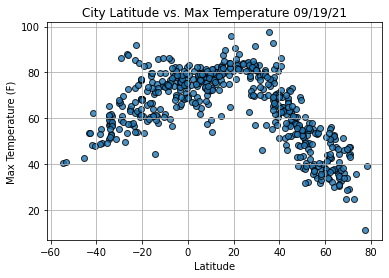

In [28]:
# Import time module
import time

#Build the scatter plot for latitude vs max temperature

plt.scatter(lats,
           max_temps,
           edgecolor ="black", linewidths =1,marker ='o',
            alpha = 0.8, label ="Cities")
            
#incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

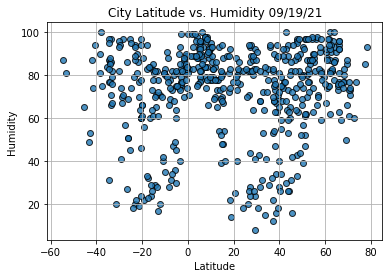

In [29]:
#Build the scatter plot for latitude vs Humidity

plt.scatter(lats,
           humidity,
           edgecolor ="black", linewidths =1,marker ='o',
            alpha = 0.8, label ="Cities")
            
#incorporate other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig2.png")

# Show plot.
plt.show()

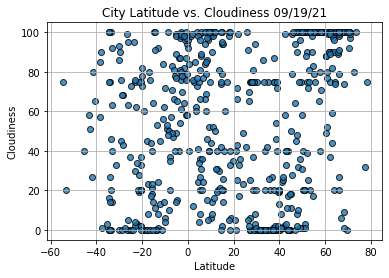

In [30]:
#Build the scatter plot for latitude vs Cloudiness

plt.scatter(lats,
           cloudiness,
           edgecolor ="black", linewidths =1,marker ='o',
            alpha = 0.8, label ="Cities")
            
#incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig3.png")

# Show plot.
plt.show()

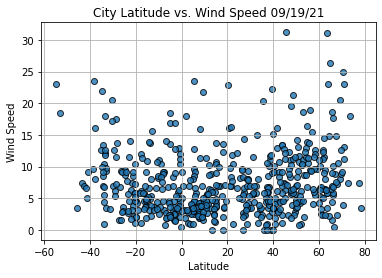

In [31]:
#Build the scatter plot for latitude vs windspeed

plt.scatter(lats,
           wind_speed,
           edgecolor ="black", linewidths =1,marker ='o',
            alpha = 0.8, label ="Cities")
            
#incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig4.png")

# Show plot.
plt.show()

In [38]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
index13 = city_data_df.loc[13]
index13

City                    Cajamarca
Country                        PE
Date          2021-09-20 00:22:54
Lat                       -7.1638
Lng                      -78.5003
Max Temp                    56.68
Humidity                       82
Cloudiness                     83
Wind Speed                   0.78
Name: 13, dtype: object

In [42]:
city_data_df["Lat"] >= 0


0      False
1      False
2      False
3      False
4       True
       ...  
543    False
544     True
545     True
546     True
547     True
Name: Lat, Length: 548, dtype: bool

In [44]:
northern_hemi_df =city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df =city_data_df.loc[(city_data_df["Lat"] < 0)]

-0.8093569440858436


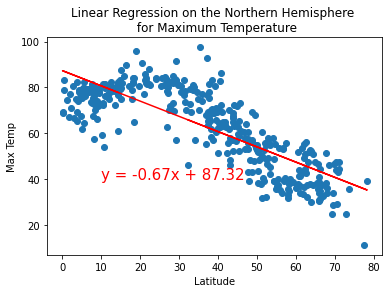

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,40))

0.6608258934942541


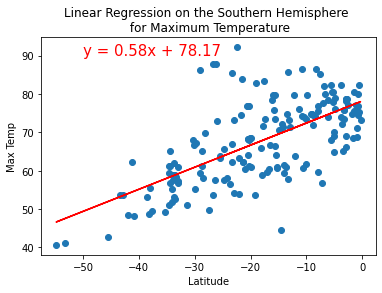

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

-0.0398329434834404


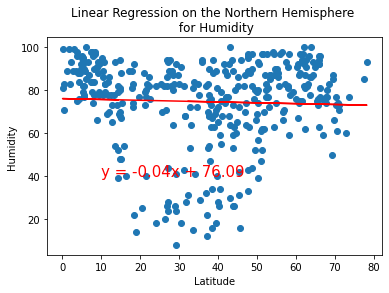

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Humidity', 
                       'Humidity',(10,40))

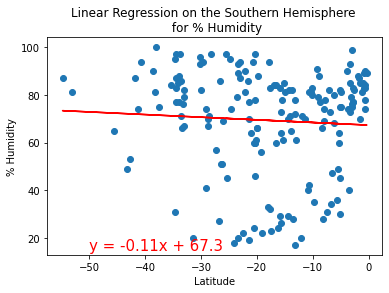

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

0.15271260754989385


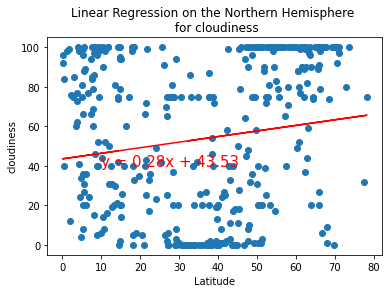

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for cloudiness', 
                       'cloudiness',(10,40))

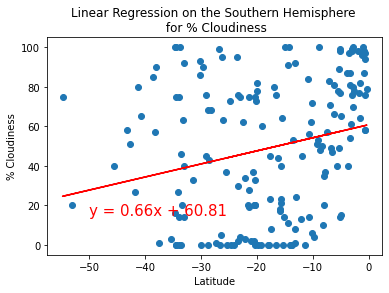

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

0.28753668796654086


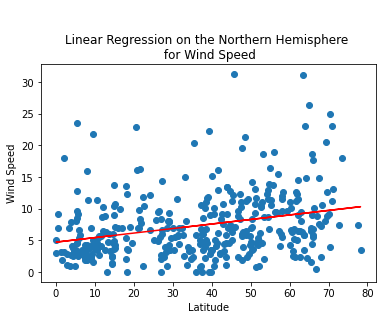

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(10,40))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Wind Speed', '% Wind Speed',(-50,15))